In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')


df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = df['DayOfWeek'] >= 5


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)


df['Lag_1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Lag_12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['RollingMean_3'] = df['Monthly Mean Total Sunspot Number'].rolling(window=3).mean()
df['RollingStd_3'] = df['Monthly Mean Total Sunspot Number'].rolling(window=3).std()
df['Diff_1'] = df['Monthly Mean Total Sunspot Number'].diff(periods=1)
df['ExpandingMean'] = df['Monthly Mean Total Sunspot Number'].expanding().mean()


df = df.dropna()


features_to_scale = ['Monthly Mean Total Sunspot Number', 'Lag_1', 'Lag_12',
                     'RollingMean_3', 'RollingStd_3', 'Diff_1', 'ExpandingMean']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


X = df_scaled[['Lag_1', 'Lag_12', 'RollingMean_3', 'RollingStd_3',
               'Diff_1', 'ExpandingMean', 'Month_sin', 'Month_cos',
               'DayOfWeek_sin', 'DayOfWeek_cos']]
y = df_scaled['Monthly Mean Total Sunspot Number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Epoch 1/50


c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4010 - val_loss: 0.0220
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0179 - val_loss: 0.0129
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105 - val_loss: 0.0115
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0084
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0028


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')


df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)


df['Lag_1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Lag_12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['RollingMean_3'] = df['Monthly Mean Total Sunspot Number'].rolling(3).mean()
df['RollingStd_3'] = df['Monthly Mean Total Sunspot Number'].rolling(3).std()
df['Diff_1'] = df['Monthly Mean Total Sunspot Number'].diff(1)
df['ExpandingMean'] = df['Monthly Mean Total Sunspot Number'].expanding().mean()


df['Target'] = df['Monthly Mean Total Sunspot Number'].shift(-1)


df = df.dropna()


features_to_scale = ['Monthly Mean Total Sunspot Number', 'Lag_1', 'Lag_12',
                     'RollingMean_3', 'RollingStd_3', 'Diff_1', 'ExpandingMean']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


X = df_scaled[['Lag_1', 'Lag_12', 'RollingMean_3', 'RollingStd_3', 'Diff_1', 'ExpandingMean',
               'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'IsWeekend']]
y = df_scaled['Target']
print("Özellikler (X):")
print(X.head())
print("\nHedef Değişken (y):")
print(y.head())
print("\nÖzelliklerin Ölçeklenmiş Değerleri:")
print(df_scaled[features_to_scale].head())
print("\nÖlçeklenmiş Hedef Değişken:")
print(df_scaled['Target'].head())   
print("\nVeri Setinin İlk 5 Satırı:")
print(df_scaled.head()) 
print("\nVeri Setinin Son 5 Satırı:")
print(df_scaled.tail()) 
import pandas as pd


results_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual_Scaled': y_test.values,
    
})


results_df.to_csv("sunspot_predictions_rf.csv", index=False)

print("Tahminler başarıyla 'sunspot_predictions_rf.csv' dosyasına kaydedildi.")



Özellikler (X):
               Lag_1    Lag_12  RollingMean_3  RollingStd_3    Diff_1  \
Date                                                                    
1750-01-31  0.889255  0.215599       1.436626      4.741416 -0.724625   
1750-02-28  0.597543  0.327604       0.738430     -0.440005  0.159017   
1750-03-31  0.660895  0.510348       0.772377     -0.143575  0.815333   
1750-04-30  0.987966  0.158123       0.899045     -0.284892 -0.053643   
1750-05-31  0.965867  0.878784       1.018114     -1.141759  0.104019   

            ExpandingMean  Month_sin     Month_cos  DayOfWeek_sin  \
Date                                                                
1750-01-31       6.989125   0.500000  8.660254e-01      -0.974928   
1750-02-28       6.919084   0.866025  5.000000e-01      -0.974928   
1750-03-31       7.054496   1.000000  6.123234e-17       0.781831   
1750-04-30       7.160558   0.866025 -5.000000e-01       0.433884   
1750-05-31       7.275968   0.500000 -8.660254e-01      -0

c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


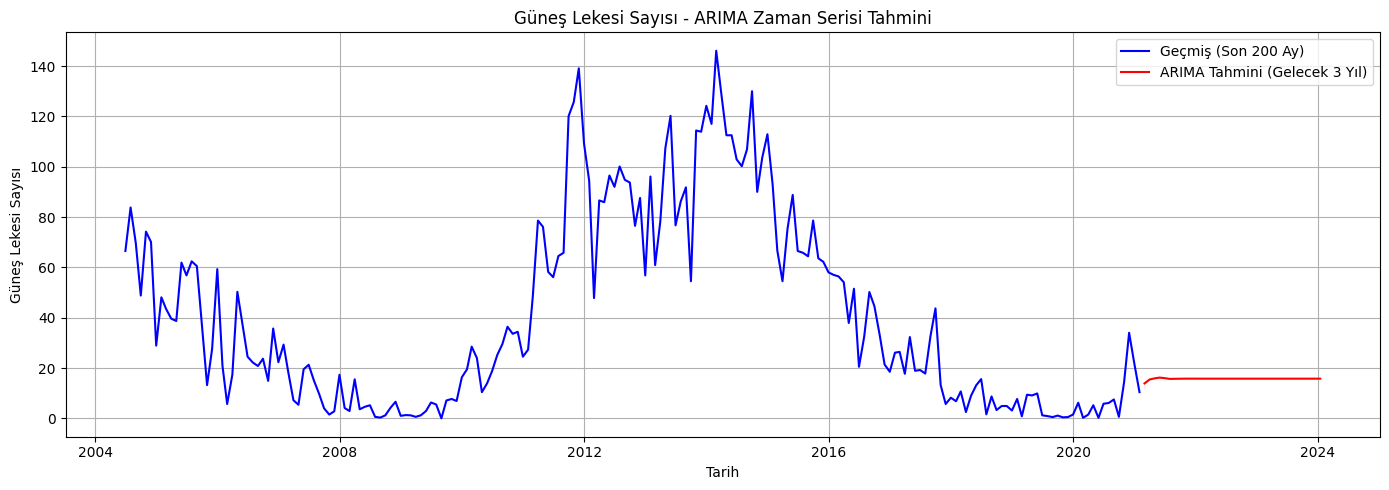

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# 1. Veriyi yükle
df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 2. Hedef değişkeni seç (orijinal, ölçeklenmemiş)
ts = df['Monthly Mean Total Sunspot Number'].dropna()

# 3. ARIMA modelini kur (örnek parametre: p=5, d=1, q=2)
model = ARIMA(ts, order=(5, 1, 2))
model_fit = model.fit()

# 4. 36 ay (3 yıl) ileriye tahmin yap
forecast_steps = 36
forecast = model_fit.forecast(steps=forecast_steps)

# 5. Tahmin tarihlerini oluştur
last_date = ts.index[-1]
future_dates = [last_date + timedelta(days=30 * i) for i in range(1, forecast_steps + 1)]

# 6. Tahminleri görselleştir
plt.figure(figsize=(14, 5))
plt.plot(ts[-200:], label='Geçmiş (Son 200 Ay)', color='blue')
plt.plot(future_dates, forecast, label='ARIMA Tahmini (Gelecek 3 Yıl)', color='red')
plt.title("Güneş Lekesi Sayısı - ARIMA Zaman Serisi Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


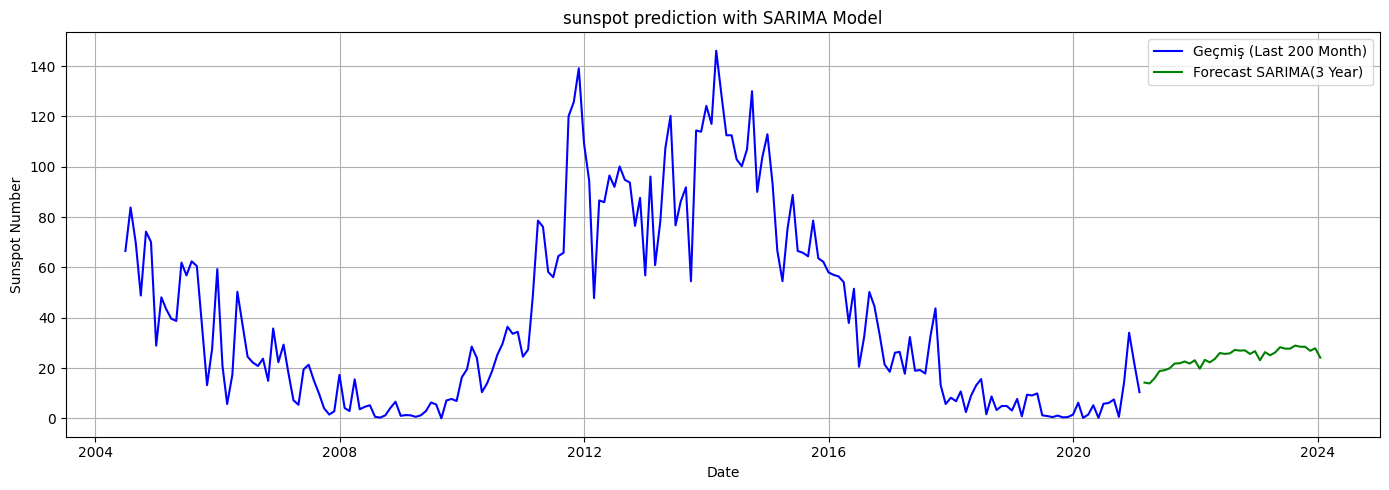

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta


df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
ts = df['Monthly Mean Total Sunspot Number'].dropna()


model = SARIMAX(ts, order=(2,1,2), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)


forecast_steps = 36
forecast = model_fit.forecast(steps=forecast_steps)


last_date = ts.index[-1]
future_dates = [last_date + timedelta(days=30 * i) for i in range(1, forecast_steps + 1)]


plt.figure(figsize=(14, 5))
plt.plot(ts[-200:], label='Geçmiş (Last 200 Month)', color='blue')
plt.plot(future_dates, forecast, label='Forecast SARIMA(3 Year) ', color='green')
plt.title("sunspot prediction with SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
import pandas as pd


df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
ts = df['Monthly Mean Total Sunspot Number'].dropna()


model = SARIMAX(ts, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)


forecast_steps = 36
forecast = model_fit.forecast(steps=forecast_steps)


last_date = ts.index[-1]
future_dates = [last_date + timedelta(days=30 * i) for i in range(1, forecast_steps + 1)]


forecast_df = pd.DataFrame({
    "Date": future_dates,
    "SARIMA_Forecast": forecast
})


forecast_df.to_csv("sarima_sunspot_forecast.csv", index=True)




c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Monster\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


PermissionError: [Errno 13] Permission denied: 'sarima_sunspot_forecast.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')


df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)


df['Lag_1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Lag_12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['RollingMean_3'] = df['Monthly Mean Total Sunspot Number'].rolling(3).mean()
df['RollingStd_3'] = df['Monthly Mean Total Sunspot Number'].rolling(3).std()
df['Diff_1'] = df['Monthly Mean Total Sunspot Number'].diff(1)
df['ExpandingMean'] = df['Monthly Mean Total Sunspot Number'].expanding().mean()


df['Target'] = df['Monthly Mean Total Sunspot Number'].shift(-1)


df = df.dropna()


features_to_scale = ['Monthly Mean Total Sunspot Number', 'Lag_1', 'Lag_12',
                     'RollingMean_3', 'RollingStd_3', 'Diff_1', 'ExpandingMean']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])


X = df_scaled[['Lag_1', 'Lag_12', 'RollingMean_3', 'RollingStd_3', 'Diff_1', 'ExpandingMean',
               'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'IsWeekend']]
y = df_scaled['Target']


In [ ]:
# Girdi (X) ve hedef (y) veri setini oluştur
X = df_scaled[['Lag_1', 'Lag_12', 'RollingMean_3', 'RollingStd_3',
               'Diff_1', 'ExpandingMean', 'Month_sin', 'Month_cos',
               'DayOfWeek_sin', 'DayOfWeek_cos', 'IsWeekend']]

y = df_scaled['Target']  # Hedef: bir sonraki ayın güneş lekesi sayısı


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Real Value', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Forecast (Random Forest)', color='orange')
plt.title("Sunspot prediction with Random Forest ")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


In [ ]:
from datetime import timedelta
import numpy as np
import pandas as pd


last_known_date = df_scaled.index[-1]
last_row = df_scaled.iloc[-1].copy()


future_preds = []


for i in range(36):
    next_date = last_known_date + pd.DateOffset(months=1)
    last_known_date = next_date

    
    month = next_date.month
    day_of_week = next_date.dayofweek
    is_weekend = int(day_of_week >= 5)

    
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)
    day_sin = np.sin(2 * np.pi * day_of_week / 7)
    day_cos = np.cos(2 * np.pi * day_of_week / 7)

   
    new_input = pd.DataFrame([{
        'Lag_1': last_row['Target'],
        'Lag_12': last_row['Lag_11'] if 'Lag_11' in last_row else last_row['Lag_1'],
        'RollingMean_3': last_row[['Lag_1', 'RollingMean_3', 'Lag_12']].mean(),
        'RollingStd_3': last_row[['Lag_1', 'RollingMean_3', 'Lag_12']].std(),
        'Diff_1': last_row['Target'] - last_row['Lag_1'],
        'ExpandingMean': (last_row['ExpandingMean'] * (len(df_scaled)+i) + last_row['Target']) / (len(df_scaled)+i+1),
        'Month_sin': month_sin,
        'Month_cos': month_cos,
        'DayOfWeek_sin': day_sin,
        'DayOfWeek_cos': day_cos,
        'IsWeekend': is_weekend
    }])

    
    new_input = new_input.fillna(0)

    
    y_future = rf_model.predict(new_input)[0]

    
    future_preds.append((next_date, y_future))

    
    last_row['Target'] = y_future
    last_row['Lag_1'] = y_future
    last_row['Lag_12'] = last_row['Lag_1']  # ilerletme
    last_row['ExpandingMean'] = new_input['ExpandingMean'].values[0]
    last_row['RollingMean_3'] = new_input['RollingMean_3'].values[0]
    last_row['RollingStd_3'] = new_input['RollingStd_3'].values[0]


future_df = pd.DataFrame(future_preds, columns=["Date", "Predicted_Sunspot_Scaled"])
future_df.to_csv("future_sunspot_predictions.csv", index=False)
